In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#loading data
wine = load_wine()

In [3]:
#creating dataframe
data = pd.DataFrame(wine.data, columns = wine.feature_names)

In [4]:
target = pd.DataFrame(wine.target, columns = ['target'])

In [5]:
df = pd.concat([data, target], axis = 1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
data  = np.array(data)
target = np.array(target)

In [7]:
#normalization
data = (data - data.min())/(data.max() - data.min())     

In [8]:
target = target.ravel()

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.2)

In [10]:
xtrain.shape

(142, 13)

In [11]:
#model architecture
model = Sequential([   
    Dense(32, activation = 'relu', input_shape = (xtrain[1].shape)),     
    Dense(3, activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [16]:
adam = keras.optimizers.adam(lr = 0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = adam,
              metrics = ['accuracy'])

In [17]:
history = model.fit(xtrain, ytrain, epochs = 30, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
142/142 [==============================] - 1s 8ms/step - loss: 1.0777 - acc: 0.3169
Epoch 2/30
142/142 [==============================] - 0s 154us/step - loss: 1.0742 - acc: 0.3169
Epoch 3/30
142/142 [==============================] - 0s 114us/step - loss: 1.0714 - acc: 0.3169
Epoch 4/30
142/142 [==============================] - 0s 90us/step - loss: 1.0688 - acc: 0.3169
Epoch 5/30
142/142 [==============================] - 0s 113us/step - loss: 1.0662 - acc: 0.3310
Epoch 6/30
142/142 [==============================] - 0s 71us/step - loss: 1.0637 - acc: 0.3873
Epoch 7/30
142/142 [==============================] - 0s 92us/step - loss: 1.0612 - acc: 0.4507
Epoch 8/30
142/142 [==============================] - 0s 70us/step - loss: 1.0587 - acc: 0.4718
Epoch 9/30
142/142 [==============================] - 0s 55us/step - loss: 1.0565 - acc: 0.4859
Epoch 10/30
142/142 [==============================] - 0s 78us/step - loss: 1.0538 - a

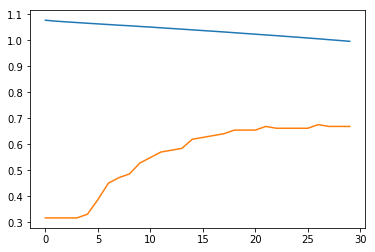

In [18]:
plt.plot(history.epoch, history.history['loss'],
        history.epoch, history.history['acc'])